# PREDATOR: **PRED**icting the imp**A**ct of cancer somatic mu**T**ations on pr**O**tein-protein inte**R**actions


## COAD


<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">Predator\src</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">PredatorStudy_COAD.ipynb</code>
</p>

<b><i class="far fa-calendar-alt" area-hidden="true" style="color:#1976D2"> </i>&nbsp; Last Edited</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">June 17th, 2022</code>
</p>


<div class="alert alert-block" style="background-color: #F5F5F5; border: 1px solid; padding: 10px; border-color: #E0E0E0">
    <b><i class="fa fa-compass" aria-hidden="true" style="color:#404040"></i></b>&nbsp; <b style="color: #404040">Purpose </b> <br>
<div>
   
- [x] Apply on Cancer Datasets
    > COAD
    
**Dependent files:**

* Target (Cancer) data: 
    - *COAD_Interface.txt*

In [3]:
from pathlib import Path

from helpers.helpers_predator.displayers import (
    visualize_label_counts,
    display_data,
)

from helpers.helpers_predator.common import load_predator

# PATHS
COAD_PATH = Path(r"../data/Elaspic_merged_results/COAD_Interface_2022-01-06.txt")
PREDATOR_MODEL_PATH = Path(r"PredatorModels/PredatorModel_2022-06-16/cc84a54e/predator.pkl")
PREDICTIONS_DATASETS_FOLDER_PATH = "../data/predictions_datasets/"

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the Predator

In [2]:
predator = load_predator(PREDATOR_MODEL_PATH)

2022-06-17 00:28:44 | INFO     | helpers.helpers_predator.common | Predator object PredatorModels\PredatorModel_2022-06-16\cc84a54e\predator.pkl is loaded successfully.


## Prediction TCGA on Cancer Dataset: COAD

In [4]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('coad', COAD_PATH)]
)

2022-06-17 00:28:58 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `coad` ..
2022-06-17 00:28:58 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_coad_data` ..
2022-06-17 00:28:59 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2022-06-17 00:28:59 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['EL2_score', 'Provean_score', 'Final_ddG', 'Interactor_alignment_score', 'Matrix_score', 'Solvent_accessibility_wt', 'van_der_waals_mut', 'Solvent_accessibility_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']
2022-06-17 00:28:59 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_coad data materials  ..


#### TCGA Cancer Datasets

##### COAD

In [5]:
display_data(predator.data_materials["coad"])

Data dimensions: (14822, 103)


,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,Domain_clan,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P62873,P62873,S334I,done,interface,-,-,-,WD40,Beta_propeller,...,567.0,128.711,135.025,73.3808,73.3852,894.75,661.58,1556.32,6.34896,3.64695
1,Q9BXB4,Q9BXB4,N590D,done,interface,COSM273062,-,-,Oxysterol_BP,Oxysterol_BP,...,742.0,464.479,464.478,199.2630,199.2630,514.015,268.27,782.285,5.08133,3.32753
2,Q9BXB4,Q9BXB4,N590D,done,interface,COSM273062,-,-,Oxysterol_BP,Oxysterol_BP,...,742.0,464.479,464.478,199.2630,199.2630,514.015,268.27,782.285,5.08133,3.32753


#### Preprocessed TCGA Cancer Datasets

##### COAD

In [6]:
display_data(predator.data_materials["target_coad_data"])

Data dimensions: (14822, 61)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,ProteinSolver_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P62873,S334I,Q13371,0.9971,0.997245,0.4626,0.417706,0.674524,0.962441,0.018744,...,567.0,128.711,135.025,73.3808,73.3852,894.750,661.58,1556.320,6.34896,3.64695
1,Q9BXB4,N590D,Q96SU4,0.2949,0.330155,0.3590,0.367350,1.239310,0.122305,0.004189,...,742.0,464.479,464.478,199.2630,199.2630,514.015,268.27,782.285,5.08133,3.32753
2,Q9BXB4,N590D,Q96SU4-3,0.2949,0.330155,0.3590,0.367350,1.239310,0.122305,0.004189,...,742.0,464.479,464.478,199.2630,199.2630,514.015,268.27,782.285,5.08133,3.32753


### Voting mode: `soft`

In [7]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('coad', COAD_PATH)]
)

2022-06-17 00:29:16 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `coad` ..
2022-06-17 00:29:16 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_coad_data` ..
2022-06-17 00:29:17 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2022-06-17 00:29:17 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['EL2_score', 'Provean_score', 'Final_ddG', 'Interactor_alignment_score', 'Matrix_score', 'Solvent_accessibility_wt', 'van_der_waals_mut', 'Solvent_accessibility_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']
2022-06-17 00:29:17 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_coad data materials  ..


In [8]:
predator.predict(voting='soft')

2022-06-17 00:29:22 | DEBUG    | Predator | Predicting on cancer datasets ..
2022-06-17 00:29:22 | DEBUG    | helpers.helpers_predator.models | Initializing EnsambledVotingClassifier.
2022-06-17 00:29:22 | DEBUG    | helpers.helpers_predator.models | Voting mode: soft
2022-06-17 00:29:22 | DEBUG    | helpers.helpers_predator.predictions | Initializing: PredictionsSoft
2022-06-17 00:29:22 | DEBUG    | Predator | Predicting on coad cohort ..
2022-06-17 00:29:22 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=380, random_state=3279)
2022-06-17 00:29:22 | DEBUG    | helpers.helpers_predator.models | X shape: (14822, 10)
2022-06-17 00:29:23 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=90,
                 

In [9]:
predator.predictions.keys()

dict_keys(['coad_prob'])

In [10]:
# Predictions for first 10 experiment.
predator.predictions["coad_prob"][:3]

[array([[0.40282868, 0.59717132],
        [0.45644079, 0.54355921],
        [0.45644079, 0.54355921],
        ...,
        [0.38068576, 0.61931424],
        [0.54659536, 0.45340464],
        [0.91127129, 0.08872871]]),
 array([[0.44560671, 0.55439329],
        [0.6023161 , 0.3976839 ],
        [0.6023161 , 0.3976839 ],
        ...,
        [0.52867091, 0.47132909],
        [0.65784435, 0.34215565],
        [0.81689079, 0.18310921]]),
 array([[0.38368084, 0.61631916],
        [0.70143272, 0.29856728],
        [0.70143272, 0.29856728],
        ...,
        [0.35172671, 0.64827329],
        [0.37471592, 0.62528408],
        [0.87838541, 0.12161459]])]

#### Predictions Post Processing

Post processing of predictions involves following steps:

##### 1. Merging Predictions with SNV Data

The prediction column is merged with SNV data for each experiment.

$\text{For each experiment } n: $

$$
  \textit{(Prediction Merged Data)}_n = \underbrace{[\textit{Predictions}_n]}_\text{Probs Percentages} + 
      \underbrace{[\textit{Protein }] [\textit{Mutation }] [\textit{Interactor }]}_\text{Cancer Data Triplets} + \underbrace{[\textit{Features }] }_\text{Elaspic}
$$


##### 2. Convert to 1-isomer: `Interactor_UniProt_ID`

$\textit{Interactor_UniProt_ID}$ column contains isomer proteins. Here, we convert them into primary isoform representation (i.e. without dashes).

| Interactor_UniProt_ID |
--------------
| P38936     |
| P16473     |
| P16473-2   |
| P19793     |

##### 3. Dropping Invalid Predictions

Entries whose predicted class-1 probability lies in both `Decreasing` and `Increasing+NoEff` are dropped.

Due to having different features for the same $\textit{(protein, mutation, interactor)}$ triplet from ELASPIC, the triplet $\textit{(protein, mutation, interactor)}$ may contain class-1 probability prediction of both lower than 0.50 and higher than 50. We drop such instances.

In [11]:
predator.predictions_post_process()

2022-06-17 00:29:56 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2022-06-17 00:29:56 | DEBUG    | helpers.helpers_predator.predictions | Post processing predictions for cohort coad ..
2022-06-17 00:29:56 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2022-06-17 00:29:56 | DEBUG    | helpers.helpers_predator.predictions | Merging predictions with coad cancer dataset ..
2022-06-17 00:29:56 | DEBUG    | helpers.helpers_predator.predictions | Handling valid and invalid entries ..


  0%|          | 0/38 [00:00<?, ?it/s]

2022-06-17 00:31:21 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 1817): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.603699  P15056    V600E     P53667
1    0.487194  P15056    V600E     P53667
2    0.603699  P15056    V600E     P53667
3    0.399873  P05107    P192H     Q9UKX5
4    0.703873  P05107    P192H     Q9UKX5
2022-06-17 00:32:50 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 1597): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.547884  Q9UK17     A16T     Q9NS61
1    0.547884  Q9UK17     A16T     Q9NS61
2    0.485536  Q9UK17     A16T     Q9NS61
3    0.466059  Q9UK17     A16T     Q9NS61
4    0.466059  Q9UK17     A16T     Q9NS61
2022-06-17 00:34:23 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 2062): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.425846  P15056    V600E     P53667
1    0.617256  P15056    V600E     P53667
2   

In [12]:
predator.predictions.keys()

dict_keys(['coad_prob', 'coad_predicted_probs_datasets', 'coad_predicted_valid_datasets', 'coad_predicted_invalid_datasets', 'coad_finalized_prediction_dataframes'])

In [13]:
display_data(predator.predictions["coad_predicted_probs_datasets"][0])

Data dimensions: (14822, 104)


,Prediction,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0.597171,P62873,P62873,S334I,done,interface,-,-,-,WD40,...,567.0,128.711,135.025,73.3808,73.3852,894.75,661.58,1556.32,6.34896,3.64695
1,0.543559,Q9BXB4,Q9BXB4,N590D,done,interface,COSM273062,-,-,Oxysterol_BP,...,742.0,464.479,464.478,199.2630,199.2630,514.015,268.27,782.285,5.08133,3.32753
2,0.543559,Q9BXB4,Q9BXB4,N590D,done,interface,COSM273062,-,-,Oxysterol_BP,...,742.0,464.479,464.478,199.2630,199.2630,514.015,268.27,782.285,5.08133,3.32753


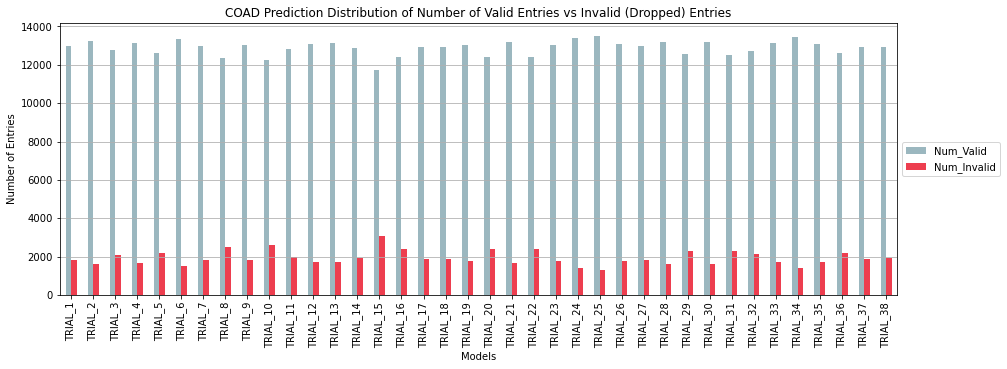

In [14]:
predator.predictions.plot_distribution_valid_vs_invalid("coad")

2022-06-17 09:21:08 | DEBUG    | helpers.helpers_predator.predictions | Plotting number of finalized predictions per model.
Note that following plot shows the number of (protein, mutation, interactor) triplets which had valid prediction.


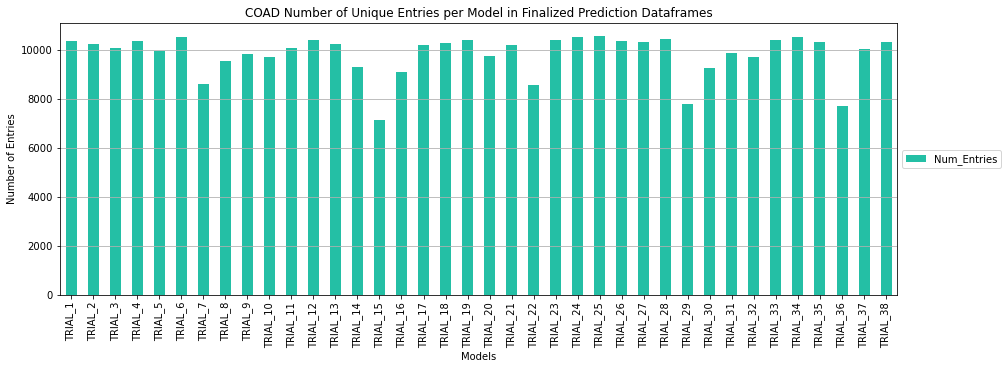

In [15]:
predator.predictions.plot_num_finalized_predictions("coad")

In [16]:
display_data(predator.predictions['coad_finalized_prediction_dataframes'][0])

Data dimensions: (10381, 4)


,Prediction,UniProt_ID,Mutation,Interactor_UniProt_ID
0,0.597171,P62873,S334I,Q13371
1,0.543559,Q9BXB4,N590D,Q96SU4
2,0.748348,P35251,V921A,P35250


In [17]:
predator.prepare_ensemble_prediction_data()

2022-06-17 09:21:15 | INFO     | helpers.helpers_predator.predictions | PredictionsSoft
2022-06-17 09:21:15 | INFO     | helpers.helpers_predator.predictions | Preparing ensemble prediction data for coad taking median ..


  0%|          | 0/38 [00:00<?, ?it/s]

2022-06-17 09:49:01 | DEBUG    | helpers.helpers_predator.predictions | Prediction probabilities data for coad is prepared.
Accessible from `coad_predictions_prob_data`.
2022-06-17 09:49:01 | DEBUG    | helpers.helpers_predator.predictions | Ensemble prediction data for coad is prepared.
Accessible from `coad_ensemble_prediction_data`.
2022-06-17 09:49:01 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data is available for coad.
Accessible from predictions.['coad_prediction_results']
2022-06-17 09:49:01 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data (no_votes dropped) is available for coad.
Accessible from predictions.['coad_prediction_results_no_votes_dropped']


In [18]:
display_data(predator.predictions['coad_predictions_prob_data'])

Data dimensions: (7816, 40)


,Trial 0,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8,Trial 9,...,Trial 30,Trial 31,Trial 32,Trial 33,Trial 34,Trial 35,Trial 36,Trial 37,PROB_1s_AVG,VOTED_PREDICTION
0,0.597171,0.554393,0.616319,0.544714,0.621731,0.461501,0.298626,0.553908,0.464965,0.445855,...,0.399406,0.557836,0.52439,0.53999,0.486987,0.571429,0.435207,0.421459,0.53995,1
1,0.543559,0.397684,0.298567,0.356935,0.274992,0.327283,0.45076,0.54446,0.379662,0.465146,...,0.326284,0.420351,0.362239,0.33799,0.273174,0.0,0.31022,0.328899,0.33033,0
2,0.748348,0.561629,0.742113,0.73496,0.807738,0.648397,0.682282,0.664652,0.586111,0.776599,...,0.727866,0.896336,0.635713,0.794412,0.728955,0.833333,0.760591,0.734403,0.74523,1


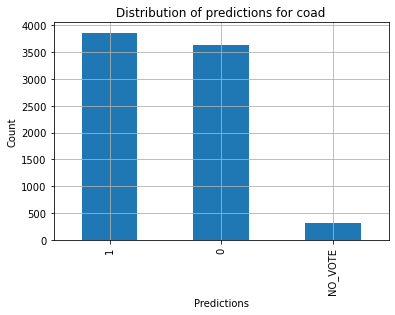

In [19]:
predator.predictions.plot_ensemble_prediction_distribution("coad")

In [20]:
coad_prediction_results_soft = predator.predictions['coad_prediction_results']
display_data(coad_prediction_results_soft)

Data dimensions: (7816, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P62873,S334I,Q13371,1
1,Q9BXB4,N590D,Q96SU4,0
2,P35251,V921A,P35250,1


In [21]:
coad_prediction_results_soft_no_votes_dropped = predator.predictions["coad_prediction_results_no_votes_dropped"]
display_data(coad_prediction_results_soft_no_votes_dropped)

Data dimensions: (7496, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P62873,S334I,Q13371,1
1,Q9BXB4,N590D,Q96SU4,0
2,P35251,V921A,P35250,1


Label counts:
Increasing + No Effect    3632
Disrupting                3864
Name: Prediction, dtype: int64


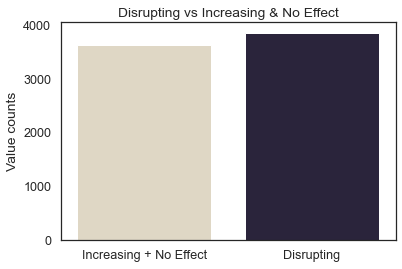

In [22]:
visualize_label_counts(coad_prediction_results_soft_no_votes_dropped, 'Prediction')

In [23]:
coad_ensemble_prediction_data_soft = predator.predictions["coad_ensemble_prediction_data"]

In [24]:
coad_predictions_prob_data_soft = predator.predictions["coad_predictions_prob_data"]

In [25]:
def add_median_probabilities(prediction_results, predictions_prob_data):
    assert len(prediction_results) == len(predictions_prob_data)
    prediction_results_with_probabilities = prediction_results.copy()
    prediction_results_with_probabilities["Median_Probability"] = predictions_prob_data["PROB_1s_AVG"]
    return prediction_results_with_probabilities

In [26]:
coad_prediction_results_soft_with_median_probs = add_median_probabilities(
    prediction_results=predator.predictions["coad_prediction_results"],
    predictions_prob_data=predator.predictions["coad_predictions_prob_data"]
)
coad_prediction_results_soft_with_median_probs.head()

,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,P62873,S334I,Q13371,1,0.53995
1,Q9BXB4,N590D,Q96SU4,0,0.33033
2,P35251,V921A,P35250,1,0.74523
3,P08123,K1248N,P25940,0,0.20567
4,P15056,V600E,P53667,1,0.56008


In [27]:
coad_prediction_results_soft_no_votes_dropped_with_median_probabilities = coad_prediction_results_soft_with_median_probs[
    coad_prediction_results_soft_with_median_probs['Prediction'].isin([0, 1])
]

In [28]:
len(coad_prediction_results_soft_no_votes_dropped_with_median_probabilities)

7496

## Exporting Predictions

In [29]:
# coad_prediction_results = coad_prediction_results_hard_no_votes_dropped
# coad_prediction_results = coad_prediction_results_soft_no_votes_dropped
coad_prediction_results = coad_prediction_results_soft_no_votes_dropped_with_median_probabilities
display_data(coad_prediction_results)

Data dimensions: (7496, 5)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,P62873,S334I,Q13371,1,0.53995
1,Q9BXB4,N590D,Q96SU4,0,0.33033
2,P35251,V921A,P35250,1,0.74523


In [30]:
predator.export_prediction(
    tcga="coad",
    data=coad_prediction_results,
    file_name="predictions",
    folder_path=PREDICTIONS_DATASETS_FOLDER_PATH,
    voting="soft",
    overwrite=False,
    file_extension='csv'
)

2022-06-17 10:06:25 | DEBUG    | helpers.helpers_predator.common | Folder with ID 84fd283a is created.
2022-06-17 10:06:25 | DEBUG    | helpers.helpers_predator.common | Exporting data predictions at location ../data/predictions_datasets/ in folder coad_prediction_2022-06-17\84fd283a..
2022-06-17 10:06:25 | INFO     | helpers.helpers_predator.common | ../data/predictions_datasets/coad_prediction_2022-06-17\84fd283a\predictions_soft_2022-06-17.csv is exported successfully.
2022-06-17 10:06:25 | INFO     | helpers.helpers_predator.common | Config is exported.


---